# Sección 1: Cálculo de Derivadas y Gradientes

Calcula las derivadas/gradientes de las siguientes funciones y evalúalas en los puntos especificados. Puedes usar PyTorch, TensorFlow o ambos frameworks.

In [ ]:
!pip install torch==2.9.0

In [85]:
import torch
import math

def solve(f, *sample):
    y = f(*sample)
    y.backward()

    sample_items = ", ".join([str(v.item()) for v in sample])
    grad_items = ", ".join([str(v.grad.item()) for v in sample])

    print(f"f({sample_items}) = {y.item()}")
    print(f"∇f({sample_items}) = [{grad_items}]")
    print()

### 1. f₁(x) = 3x³ - 2x² + 5x - 1

Evaluar en: x = -1, x = 0, x = 2

In [86]:
def f(x):
    return 3*x**3 - 2*x**2 + 5*x - 1

x1 = torch.tensor(-1.0, requires_grad=True)
x2 = torch.tensor(0.0, requires_grad=True)
x3 = torch.tensor(2.0, requires_grad=True)

solve(f, x1)
solve(f, x2)
solve(f, x3)

f(-1.0) = -11.0
∇f(-1.0) = [18.0]

f(0.0) = -1.0
∇f(0.0) = [5.0]

f(2.0) = 25.0
∇f(2.0) = [33.0]



### 2. f₂(x, y) = x² + y² - 2xy + 4x

Evaluar en: (1, 1), (-2, 3), (0, 0)\
Calcular ∇f₂ = [∂f/∂x, ∂f/∂y]

In [87]:
def f(x, y):
    return x**2 + y**2 - 2*x*y + 4*x

# (1, 1)
x1 = torch.tensor(1.0, requires_grad=True)
y1 = torch.tensor(1.0, requires_grad=True)

# (-2, 3)
x2 = torch.tensor(-2.0, requires_grad=True)
y2 = torch.tensor(3.0, requires_grad=True)

# (0, 0)
x3 = torch.tensor(0.0, requires_grad=True)
y3 = torch.tensor(0.0, requires_grad=True)

solve(f, x1, y1)
solve(f, x2, y2)
solve(f, x3, y3)

f(1.0, 1.0) = 4.0
∇f(1.0, 1.0) = [4.0, 0.0]

f(-2.0, 3.0) = 17.0
∇f(-2.0, 3.0) = [-6.0, 10.0]

f(0.0, 0.0) = 0.0
∇f(0.0, 0.0) = [4.0, 0.0]



### 3. f₃(x) = e^(-x²) · cos(x)

Evaluar en: x = 0, x = π/4, x = 1

In [88]:
def f(x):
    return torch.exp(-x**2) * torch.cos(x)

x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(math.pi/4, requires_grad=True)
x3 = torch.tensor(1.0, requires_grad=True)

solve(f, x1)
solve(f, x2)
solve(f, x3)

f(0.0) = 1.0
∇f(0.0) = [-0.0]

f(0.7853981852531433) = 0.381584107875824
∇f(0.7853981852531433) = [-0.9809750318527222]

f(1.0) = 0.19876612722873688
∇f(1.0) = [-0.7070921659469604]



### 4. f₄(x, y, z) = x²y + y²z + z²x

Evaluar en: (1, 2, 3), (-1, 0, 1), (2, 2, 2)\
Calcular ∇f₄ = [∂f/∂x, ∂f/∂y, ∂f/∂z]

In [89]:
def f(x, y, z):
    return x**2 * y + y**2 * z + z**2 * x

# (1, 2, 3)
x1 = torch.tensor(1.0, requires_grad=True)
y1 = torch.tensor(2.0, requires_grad=True)
z1 = torch.tensor(3.0, requires_grad=True)

# (-1, 0, 1)
x2 = torch.tensor(-1.0, requires_grad=True)
y2 = torch.tensor(0.0, requires_grad=True)
z2 = torch.tensor(1.0, requires_grad=True)

# (2, 2, 2)
x3 = torch.tensor(2.0, requires_grad=True)
y3 = torch.tensor(2.0, requires_grad=True)
z3 = torch.tensor(2.0, requires_grad=True)

solve(f, x1, y1, z1)
solve(f, x2, y2, z2)
solve(f, x3, y3, z3)

f(1.0, 2.0, 3.0) = 23.0
∇f(1.0, 2.0, 3.0) = [13.0, 13.0, 10.0]

f(-1.0, 0.0, 1.0) = -1.0
∇f(-1.0, 0.0, 1.0) = [1.0, 1.0, -2.0]

f(2.0, 2.0, 2.0) = 24.0
∇f(2.0, 2.0, 2.0) = [12.0, 12.0, 12.0]



### 5. f₅(x) = ln(1 + x²) + sin(2x)

Evaluar en: x = -1, x = 0.5, x = 2

In [90]:
def f(x):
    return torch.log(1 + x**2) + torch.sin(2*x)

x1 = torch.tensor(-1.0, requires_grad=True)
x2 = torch.tensor(0.5, requires_grad=True)
x3 = torch.tensor(2.0, requires_grad=True)

solve(f, x1)
solve(f, x2)
solve(f, x3)

f(-1.0) = -0.2161502242088318
∇f(-1.0) = [-1.8322937488555908]

f(0.5) = 1.0646145343780518
∇f(0.5) = [1.8806047439575195]

f(2.0) = 0.8526354432106018
∇f(2.0) = [-0.5072872042655945]



# Sección 2: Optimización con Gradient Descent

Implementa gradient descent para encontrar los valores óptimos de las siguientes funciones. Usa una tasa de aprendizaje apropiada e itera hasta convergencia.

In [91]:
import torch
import matplotlib.pyplot as plt

def gradient_descent(func, start_point, targets, learning_rate=0.1, max_iterations=10_000, direction=-1):
    x = torch.tensor(start_point, dtype=torch.float32, requires_grad=True)
    targets = torch.tensor(targets, dtype=torch.float32)

    history = []

    print("Starting gradient descent...")
    print(f"Initial: x = {x.detach().numpy()}, f(x) = {func(x).item():.4f}")

    for i in range(max_iterations):
        if x.grad is not None:
            x.grad.zero_()

        f = func(x)
        f.backward()

        if torch.norm(x.grad) < 0.001:
            print(f"Converged after {i} iterations!")
            break

        with torch.no_grad():
            x += direction * (learning_rate * x.grad)

        history.append(f.item())

        if i % 50 == 0:
            print(f"Iteration {i}: f(x) = {f.item():.6f}")

    print(f"Final: x = {x.detach().numpy()}, f(x) = {func(x).item():.6f}")
    print(f"Error = {(x - targets).detach().numpy()}")

    # Simple plot
    plt.figure(figsize=(8, 4))
    plt.plot(history, 'b-', linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('f(x)')
    plt.title('Convergence Progress')
    plt.grid(True, alpha=0.3)
    plt.show()

## Funciones para minimizar

### 1. g₁(x) = (x - 3)² + 5

Valor objetivo (target): x* = 3, f(x*) = 5\
Punto inicial: x₀ = 10

Starting gradient descent...
Initial: x = [10.], f(x) = 54.0000
Iteration 0: f(x) = 54.000000
Converged after 43 iterations!
Final: x = [3.0004764], f(x) = 5.000000
Error = [0.00047636]


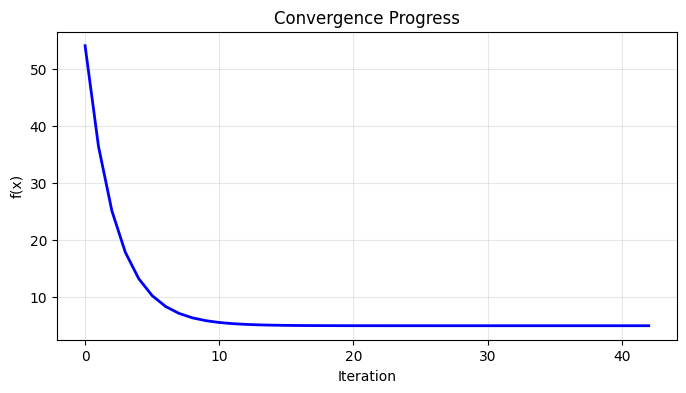

In [92]:
def f(x):
    return (x[0] - 3)**2 + 5

gradient_descent(f, [10.0], [3.0], 0.1)

### 2. g₂(x, y) = (x - 2)² + (y + 1)² + 10

Valor objetivo: x* = 2, y* = -1, f(x*, y*) = 10\
Punto inicial: x₀ = -5, y₀ = 5

Starting gradient descent...
Initial: x = [-5.  5.], f(x) = 95.0000
Iteration 0: f(x) = 95.000000
Converged after 45 iterations!
Final: x = [ 1.9996951  -0.99973863], f(x) = 10.000000
Error = [-0.00030494  0.00026137]


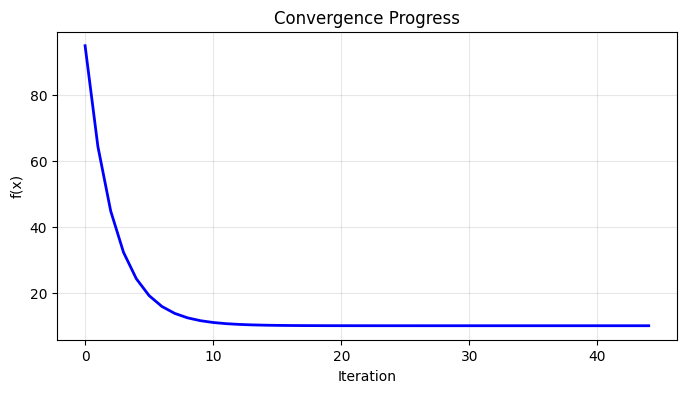

In [93]:
def f(x):
    return (x[0] - 2)**2 + (x[1] + 1)**2 + 10

gradient_descent(f, [-5.0, 5.0], [2.0, -1.0], 0.1)

### 3. g₃(x, y) = x² + 2y² - 2xy + 2x - 4y + 8

Valor objetivo aproximado: f(x*, y*) ≈ 5.5\
Punto inicial: x₀ = 0, y₀ = 0

Starting gradient descent...
Initial: x = [0. 0.], f(x) = 8.0000
Iteration 0: f(x) = 8.000000
Iteration 50: f(x) = 6.002149
Iteration 100: f(x) = 6.000044
Iteration 150: f(x) = 6.000001
Converged after 154 iterations!
Final: x = [-0.00111123  0.99931324], f(x) = 6.000001
Error = [-0.00011123  0.00031322]


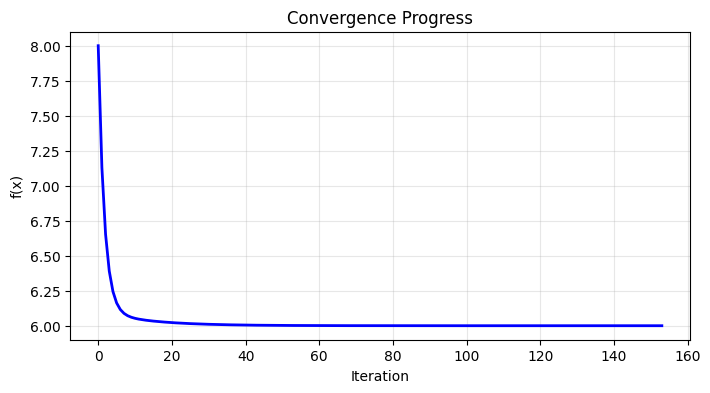

In [94]:
def f(x):
    return x[0]**2 + 2*x[1]**2 - 2*x[0]*x[1] + 2*x[0] - 4*x[1] + 8

gradient_descent(f, [0.0, 0.0], [-0.001, 0.999], 0.05)

## Funciones para maximizar

### 4. h₁(x) = -x² + 4x + 1

Valor objetivo: x* = 2, f(x*) = 5\
Punto inicial: x₀ = -3

Starting gradient descent...
Initial: x = [-3.], f(x) = -20.0000
Iteration 0: f(x) = -20.000000
Converged after 42 iterations!
Final: x = [1.9995747], f(x) = 5.000000
Error = [-0.00042534]


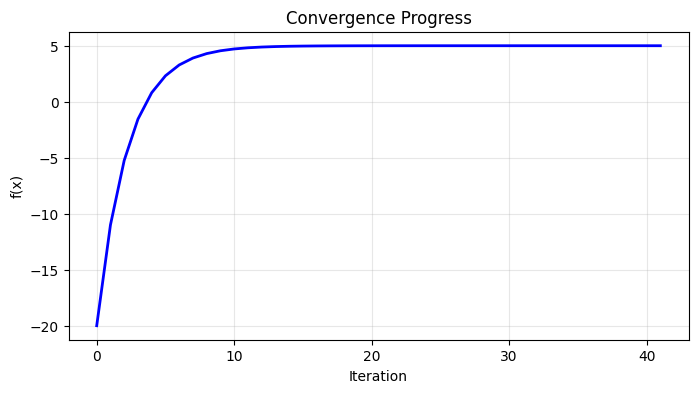

In [95]:
def f(x):
    return -x[0]**2 + 4*x[0] + 1

gradient_descent(f, [-3.0], [2.0], 0.1, direction=1)

### 5. h₂(x, y) = -(x - 1)² - (y - 2)² + 10

Valor objetivo: x* = 1, y* = 2, f(x*, y*) = 10\
Punto inicial: x₀ = 5, y₀ = -2

Starting gradient descent...
Initial: x = [ 5. -2.], f(x) = -22.0000
Iteration 0: f(x) = -22.000000
Converged after 42 iterations!
Final: x = [1.0003402 1.9996598], f(x) = 10.000000
Error = [ 0.00034022 -0.00034022]


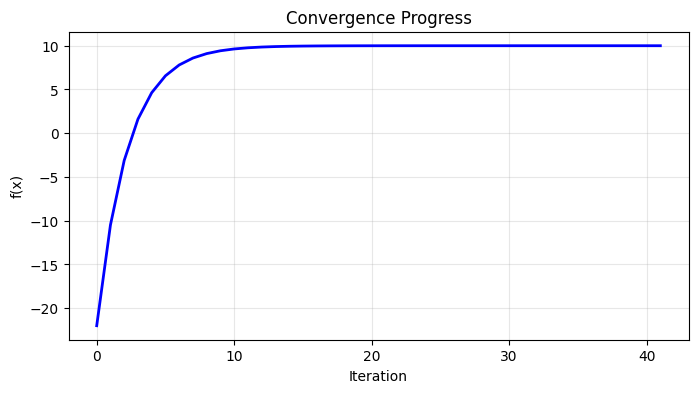

In [96]:
def f(x):
    return -(x[0] - 1)**2 - (x[1] - 2)**2 + 10

gradient_descent(f, [5.0, -2.0], [1.0, 2.0], 0.1, direction=1)